<a href="https://colab.research.google.com/github/annaphuongwit/Liane_Library/blob/main/1_understanding_time_series_KE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Decomposition
Time series decomposition is a handy technique that helps us understand what's going on in time series data by breaking it down into different parts. Usually, a time series is made up of three key components: `trend`, `seasonality`, and `residual` (or noise).
* The `trend` shows the general direction the data is heading in over time - whether it's going up, down, or staying level.
* `Seasonality` highlights repeating patterns, like a spike in sales every December or temperature changes across seasons.
* The `residual` component represents the random variations that don't fit neatly into trend or seasonality.

By separating these elements, we get a clearer picture of the data's behaviour, making it much easier to interpret and work with.

---
## 1.&nbsp; Import libraries and files 💾

In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult

In [ ]:
url: str = "https://drive.google.com/file/d/1C4YBFfVLpNxkRvPy6oylXDONREz-m159/view?usp=sharing"
path: str = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]
air_passengers: pd.DataFrame = pd.read_csv(path)

air_passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


---
##2.&nbsp; Explore the data 👩‍🚀

Let's start by quickly glancing at the date range of our dataset.

In [ ]:
earliest_date: str = air_passengers["Month"].min()
latest_date: str = air_passengers["Month"].max()

print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")

Earliest date: 1949-01
Latest date: 1960-12


Now, let's check the data types of the columns.

In [ ]:
air_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# option 1: Feature Engineering: cyclical features

In [ ]:
# option 2:

In [ ]:
air_passengers.Month.value_counts()

Month
1949-01    1
1949-02    1
1956-09    1
1956-10    1
1956-11    1
          ..
1953-01    1
1953-02    1
1953-03    1
1953-04    1
1960-12    1
Name: count, Length: 144, dtype: int64

In [ ]:
air_passengers.Month.nunique()

144

In [ ]:
air_passengers.isna().sum()

Month          0
#Passengers    0
dtype: int64

We can also look at a numerical summary of the data.

In [ ]:
air_passengers.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


Looks like the Month column needs to be converted to datetime.

In [ ]:
pd.to_datetime(air_passengers["Month"])

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [ ]:
air_passengers["Month_datetime"] = pd.to_datetime(air_passengers["Month"]) #it takes a pandas series

air_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           144 non-null    object        
 1   #Passengers     144 non-null    int64         
 2   Month_datetime  144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
air_passengers

,Month,#Passengers,Month_datetime
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01
...,...,...,...
139,1960-08,606,1960-08-01
140,1960-09,508,1960-09-01
141,1960-10,461,1960-10-01
142,1960-11,390,1960-11-01


And, for a time series, we need the dates as the index.

In [ ]:
air_passengers = air_passengers.set_index("Month_datetime")

# Ensure the data is sorted chronologically
air_passengers: pd.DataFrame = air_passengers.sort_index()

air_passengers.head()

,Month,#Passengers
Month_datetime,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [ ]:
air_passengers = air_passengers.drop(columns=['Month'])#, inplace=True)
air_passengers

,#Passengers
Month_datetime,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


/var/folders/b7/8b0bdwr52qj1ys_pgmnv_8mc0000gn/T/ipykernel_27515/891093129.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  air_passengers.resample('10Y').max().plot() #df.groupby('column').mean() / df.agg()


<Axes: xlabel='Month_datetime'>

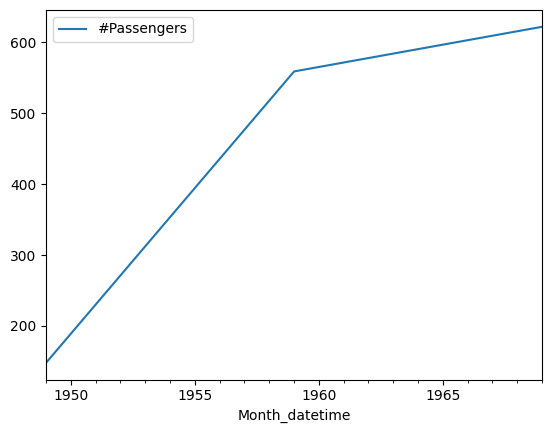

In [ ]:
air_passengers.resample('10Y').max().plot() #df.groupby('column').mean() / df.agg()

In [ ]:
import matplotlib.pyplot as plt

(-15.0, 15.0)

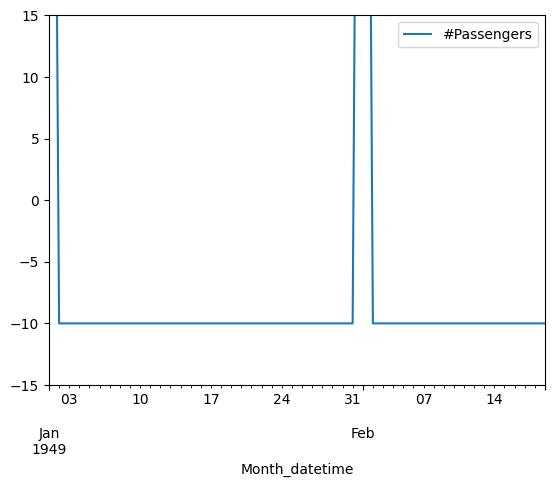

In [ ]:
air_passengers.asfreq('D', fill_value=-10).head(50).plot()#, method='backfill').plot()
#plt.yscale('log')
plt.ylim(-15, 15)

Perfect 😊 Now we can visualise the dataset to get an idea of it.

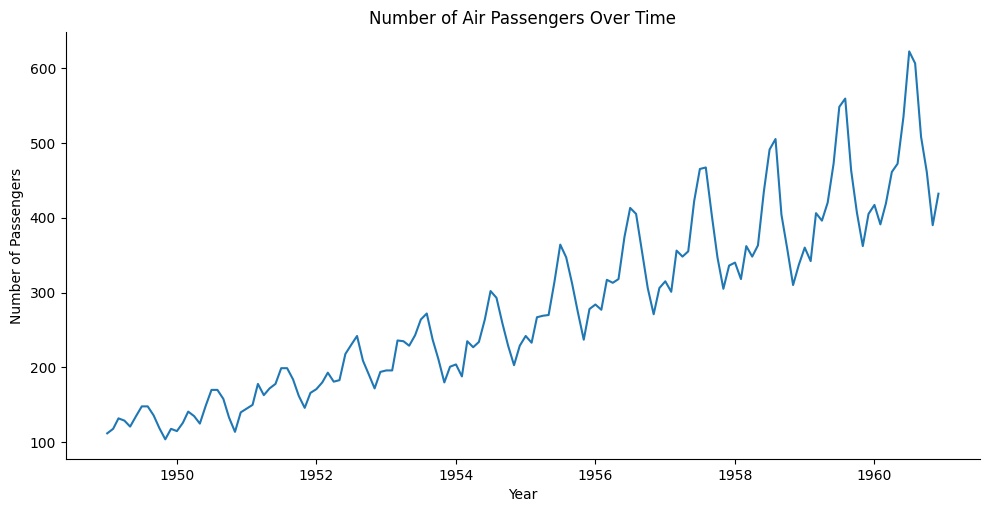

In [ ]:
(
  sns.relplot(
      kind="line",
      data=air_passengers, #air_passengers.resample('YE').mean() = Trend
      aspect=2,
      legend=False
  ).set(
      title="Number of Air Passengers Over Time",
      xlabel="Year",
      ylabel="Number of Passengers"
  )
);

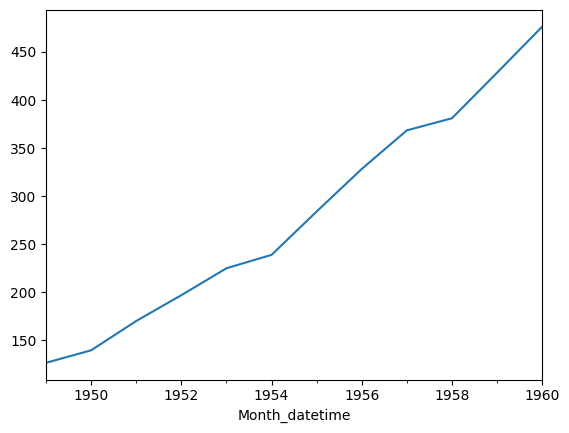

In [ ]:
air_passengers.resample('YE').mean()['#Passengers'].plot(); #trend

In [ ]:
air_passengers['month']= air_passengers.index.month
air_passengers

,#Passengers,month
Month_datetime,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5
...,...,...
1960-08-01,606,8
1960-09-01,508,9
1960-10-01,461,10


<Axes: xlabel='month'>

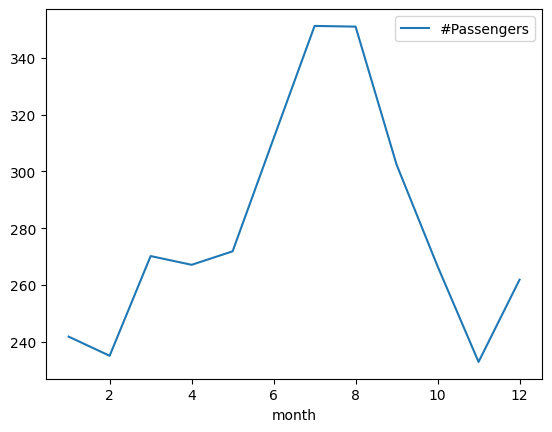

In [ ]:
air_passengers.groupby('month').mean().plot() #the seasonality

What do you see? Write a list of bullet points in the cell below.

- Your observations go here
- Add more bullet points to describe everything you see in the chart
- Double click this text cell to edit

---
## 3.&nbsp; Decomposition 🌌

Time series decomposition helps us break down a time series into its underlying patterns, such as trend, seasonality, and noise, making it easier to understand and analyse.


There are two main types of time series decomposition: additive and multiplicative. In an additive model, the components (trend, seasonality, and noise) are summed together, whereas in a multiplicative model, the components are multiplied.

Additive decomposition is used when the seasonal fluctuations are roughly constant over time. Multiplicative decomposition is suitable when seasonal effects vary proportionally with the level of the trend, resulting in larger variations when the trend is higher and smaller variations when the trend is lower. Take a look at the image above, do you think that the seasonal effects grow as the number of passengers grows?

In [ ]:
air_passengers.drop(columns=['month'], inplace=True)


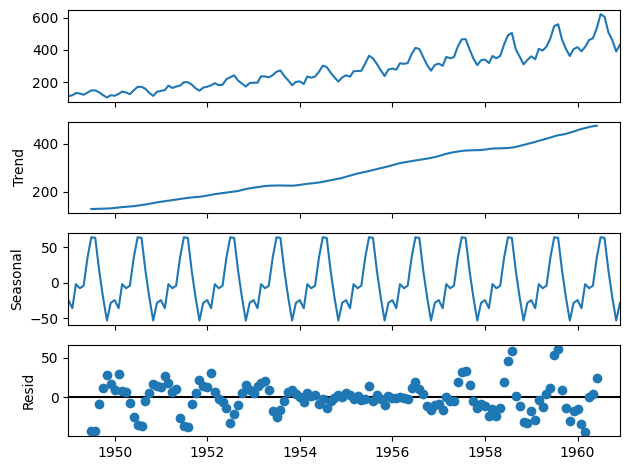

In [ ]:
decomposition: DecomposeResult = seasonal_decompose(
    air_passengers,
    model="additive" #'multiplicative'
)
decomposition.plot();

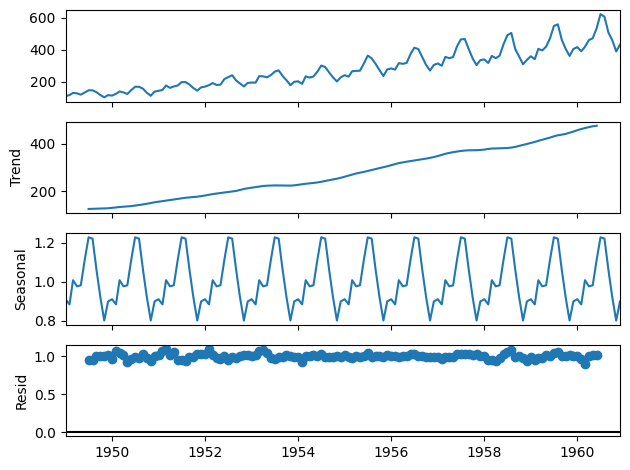

In [ ]:
decomposition: DecomposeResult = seasonal_decompose(
    air_passengers,
    model="multiplicative"
)
decomposition.plot();

Above is a traditional decomposition plot, providing a helpful overview of the data. By using our Python skills to plot each component individually, we can explore them in more detail - so let's analyse each line one by one.

Here's a function to save us repeating the same code for each plot:

In [ ]:
def plot_component(
  data_to_plot: pd.Series,
  colour: str,
  title: str
) -> sns.FacetGrid:

  g: sns.FacetGrid = sns.relplot(
      kind="line",
      data=data_to_plot,
      color=colour,
      aspect=2
  ).set(
      title=title
  )

  return g

### 3.1 Trend
The trend line represents the underlying long-term movement in the number of air passengers, smoothing out short-term fluctuations and seasonal effects.

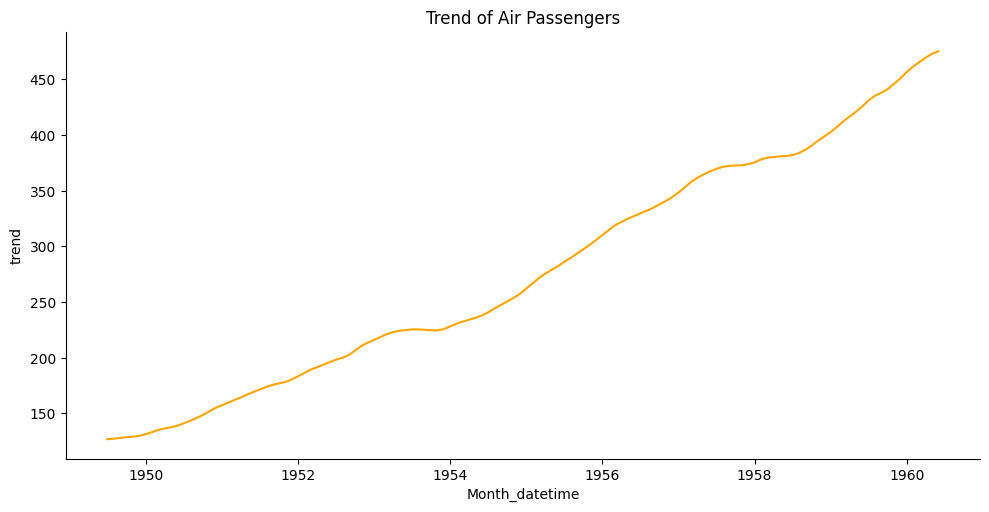

In [ ]:
plot_component(
  data_to_plot=decomposition.trend,
  colour="orange",
  title="Trend of Air Passengers"
);

The trend shows a steady increase, meaning that, on average, the number of air passengers has been growing over time. The smooth upward curve suggests that the growth is relatively consistent without abrupt changes.

### 3.2 Seasonality
The seasonality plot highlights the repeating pattern of fluctuations that occurs consistently in each given period.

In [ ]:
#seasonal vs cyclical
#Seasonal and cyclical patterns both describe recurring patterns in data,
# but they differ in their duration and regularity. Seasonality refers to predictable,
# repeating patterns within a single year (e.g., higher ice cream sales in summer). Cyclicality, on the other hand,
# involves longer, less predictable fluctuations, often tied to broader economic or business cycles, that can span multiple years.

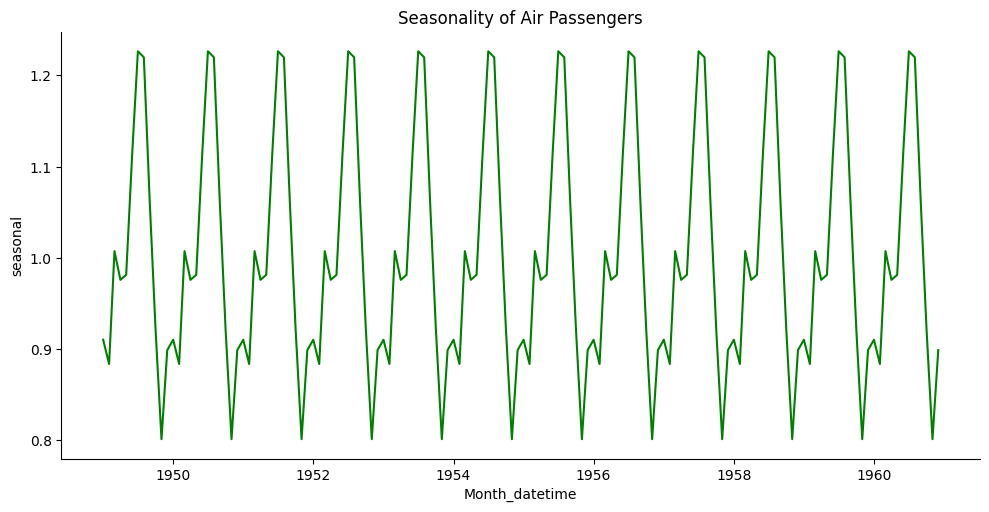

In [ ]:
plot_component(
  data_to_plot=decomposition.seasonal,
  colour="green",
  title="Seasonality of Air Passengers"
);

The plot shows distinct peaks and troughs, reflecting a strong seasonal effect where passenger numbers rise and fall at consistent times each year. The peaks likely align with high-travel months, such as holidays or vacation periods, while the troughs indicate lower travel demand. Let’s take a closer look at a single year to identify which months experience high and low air travel demand.

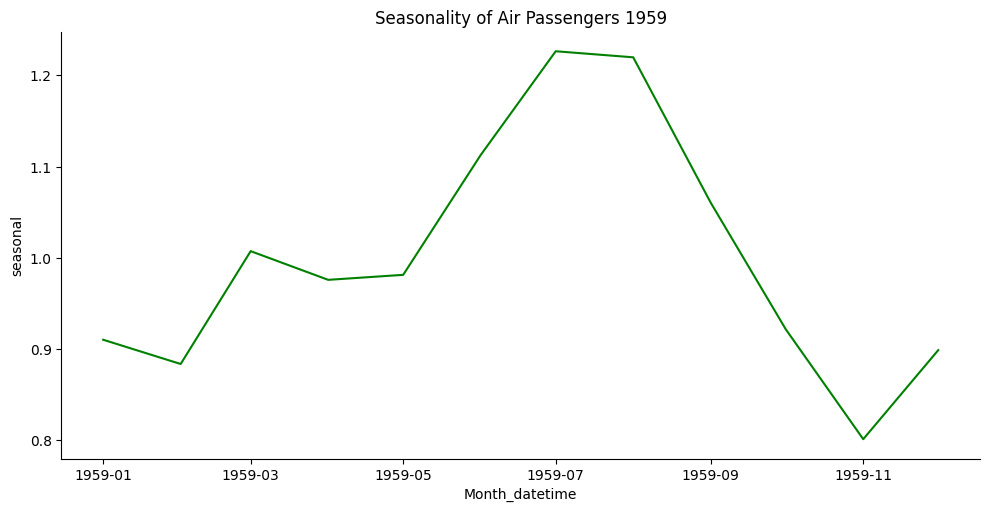

In [ ]:
plot_component(
  data_to_plot=decomposition.seasonal.loc["1959"],
  colour="green",
  title="Seasonality of Air Passengers 1959"
);

We can see that air travel demand starts increasing from around May, reaching its peak during the summer months, specifically in July and August - likely due to holiday travel. After the peak, there's a noticeable decline in passenger numbers towards the end of the year, with demand hitting its lowest point in November. We can use our python skills to see if this is true of all years in the dataset.

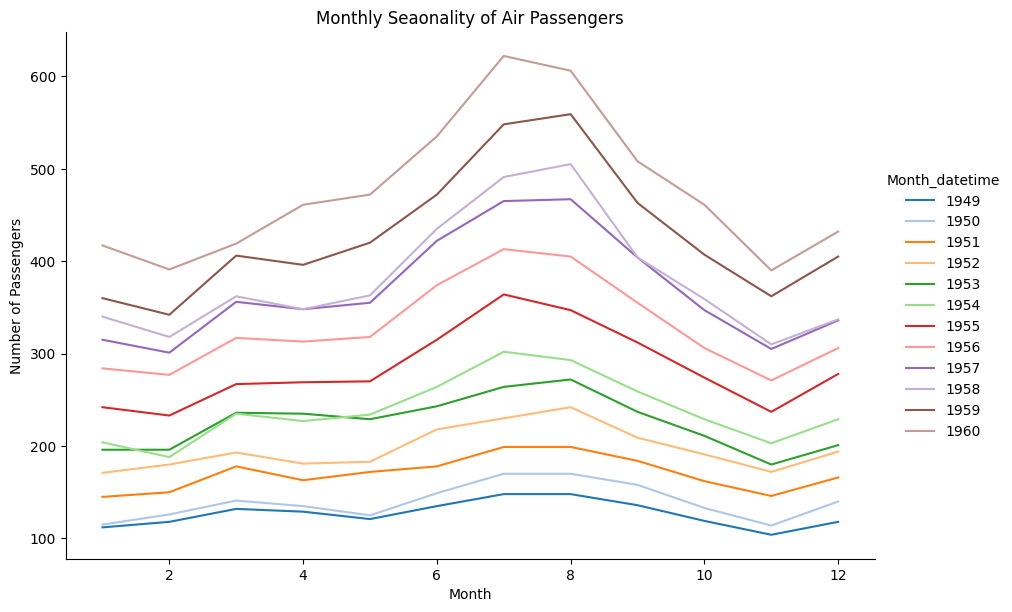

In [ ]:
(
    sns.relplot(
        kind="line",
        data=air_passengers,
        x=air_passengers.index.month,
        y="#Passengers",
        hue=air_passengers.index.year,
        palette="tab20",
        height=6,
        aspect=1.5
    ).set(
        title="Monthly Seaonality of Air Passengers",
        xlabel="Month",
        ylabel="Number of Passengers"
    )
);

The chart shows a clear, repeating pattern each year. Passenger numbers consistently rise from early in the year, peak in July and August, then drop towards year-end. This trend holds across all years, with each generally having more passengers than the last, showing long-term growth.

### 3.3 Residual

Residuals are the part of the data that remains after accounting for the trend and seasonality components. These residuals represent random noise or variations that cannot be explained by the overall trend or seasonality.

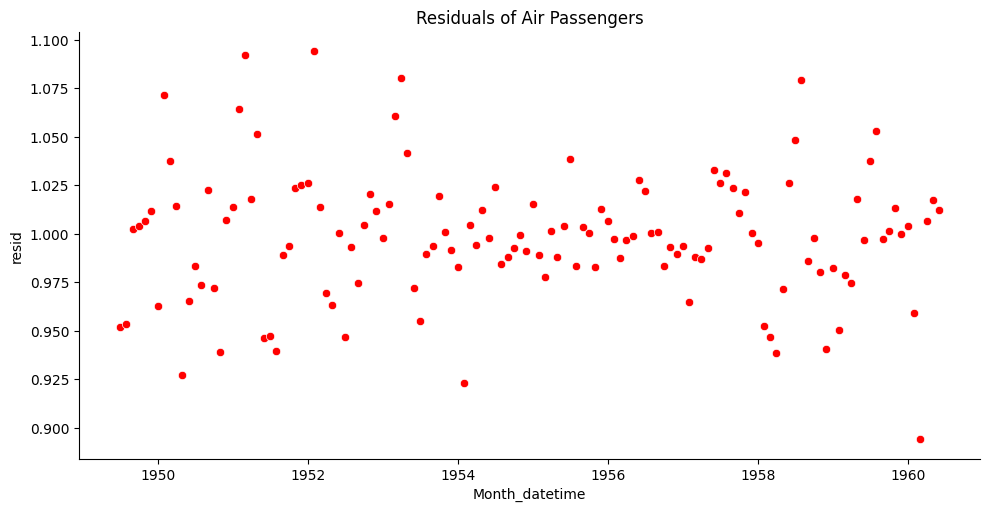

In [ ]:
(
    sns.relplot(
        kind="scatter",
        data=decomposition.resid,
        color="red",
        aspect=2
    ).set(
        title="Residuals of Air Passengers"
    )
);

Ideally, residuals should be randomly scattered with no obvious patterns, indicating that the model has captured the main structure of the data well. In this plot, however, we can see some clusters and noticeable variation in the spread of points, suggesting that the model has not fully captured all the patterns in the data. This visible structure does not necessarily mean that the decomposition was done incorrectly. It indicates that there might be additional factors influencing the data that were not captured by the basic decomposition.

---
## 4.&nbsp; Challenge: work with the London Air Quality dataset 😃

1. Download the [London Air Quality monthly averages CSV](https://data.london.gov.uk/dataset/london-average-air-quality-levels) and load it into your notebook.
2. Focus on the "Month" and "Nitrogen Dioxide (ug/m3)" columns, ensuring you use the "London Mean Roadside Nitrogen Dioxide (ug/m3)" values rather than the "London Mean Background."
3. Get familiar with the data. Check the data types, create some initial plots, and examine the raw values to understand what's in the dataset.
4. Break down the data to observe trends, seasonality, and residuals. What patterns do you see? Is there anything that stands out for further exploration? After each plot, jot down a few notes in a text cell to explain your observations and their implications.

In [ ]:
number_pass: int = 5
gender: str = 'male'
air_passengers: pd.DataFrame = air_passengers.copy()

In [ ]:
number_pass = 6.7

In [ ]:
gender = 10

In [ ]:
def multi(a: int,b: int) -> int:
    return a * b